# Object Oriented Programming (OOP): Creating a Financial Instrument Class

## An example Class: pandas.DataFrame
Goal: handling and manipulating any Tabular Data (efficiently)

In [1]:
import pandas as pd

__Instantiation__

In [ ]:
df = pd.read_csv("titanic.csv") #instantiation of DataFrame from CSV file

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [4]:
type(df)

pandas.core.frame.DataFrame

__Attributes__

In [ ]:
df.columns # column is an attribute of DataFrame class

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck'],
      dtype='object')

In [6]:
df.shape

(891, 9)

__Methods__

In [ ]:
df.info() # methods allow to perform certain actions/operations on the object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
df.sort_values(by = "age", ascending = False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
630,1,1,male,80.0,0,0,30.0000,S,A
851,0,3,male,74.0,0,0,7.7750,S,NaN
493,0,1,male,71.0,0,0,49.5042,C,NaN
96,0,1,male,71.0,0,0,34.6542,C,A
116,0,3,male,70.5,0,0,7.7500,Q,NaN
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,NaN
863,0,3,female,NaN,8,2,69.5500,S,NaN
868,0,3,male,NaN,0,0,9.5000,S,NaN
878,0,3,male,NaN,0,0,7.8958,S,NaN


## The FinancialInstrument Class live in action (Part 1)
Goal: Analyzing Financial Instruments (e.g. stocks) efficiently

In [ ]:
#pip install --upgrade yfinance

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.4 MB/s  0:00:02 eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 2.7 MB/s  0:00:02 eta 0:00:01
  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15548 sha256=473aa9afdda2e2e96d1d12163f0d09d6691416ef8d977c5e590f5e8a986ba096
  Stored in directory

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn-v0_8")

Note: you need __yfinance version 0.2.48 or higher__.

Check your currently installed version:

In [12]:
yf.__version__

'1.0'

You can upgrade with:

pip install --upgrade yfinance

In [13]:
class FinancialInstrument():
    ''' Class for analyzing Financial Instruments like stocks.

    Attributes
    ==========
    ticker: str
        ticker symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval

    Methods
    =======
    get_data:
        retrieves daily price data (from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart
    plot_returns:
        plots log returns either as time series ("ts") or histogram ("hist")
    set_ticker:
        sets a new ticker
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns (risk)
    annualized_perf:
        calculates annulized return and risk
    '''
    
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        ''' retrieves (from yahoo finance) and prepares the data
        '''
        raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame() # new from yfinance 0.2.48
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        '''calculates log returns
        '''
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        ''' creates a price chart
        '''
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self.ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self.ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        '''sets a new ticker
        '''
        if ticker is not None:
            self.ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        '''calculates mean return
        '''
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        '''calculates the standard deviation of returns (risk)
        '''
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        '''calculates annulized return and risk
        '''
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

__Instantiation__

In [35]:
stock = FinancialInstrument(ticker = "AAPL", start = "2023-01-01", 
                            end =  "2025-12-31" ) # instantiation

[*********************100%***********************]  1 of 1 completed


In [36]:
stock

FinancialInstrument(ticker = AAPL, start = 2023-01-01, end = 2025-12-31)

In [37]:
type(stock)

__main__.FinancialInstrument

__Attributes__

In [38]:
#stock.

In [39]:
stock.ticker

'AAPL'

In [40]:
stock.start

'2023-01-01'

In [41]:
stock.end

'2025-12-31'

In [42]:
stock.data

,price,log_returns
Date,,
2023-01-03,123.211212,NaN
2023-01-04,124.482033,0.010261
2023-01-05,123.161942,-0.010661
2023-01-06,127.693611,0.036134
2023-01-09,128.215729,0.004080
...,...,...
2025-12-18,272.190002,0.001287
2025-12-19,273.670013,0.005423
2025-12-22,270.970001,-0.009915


__Methods__

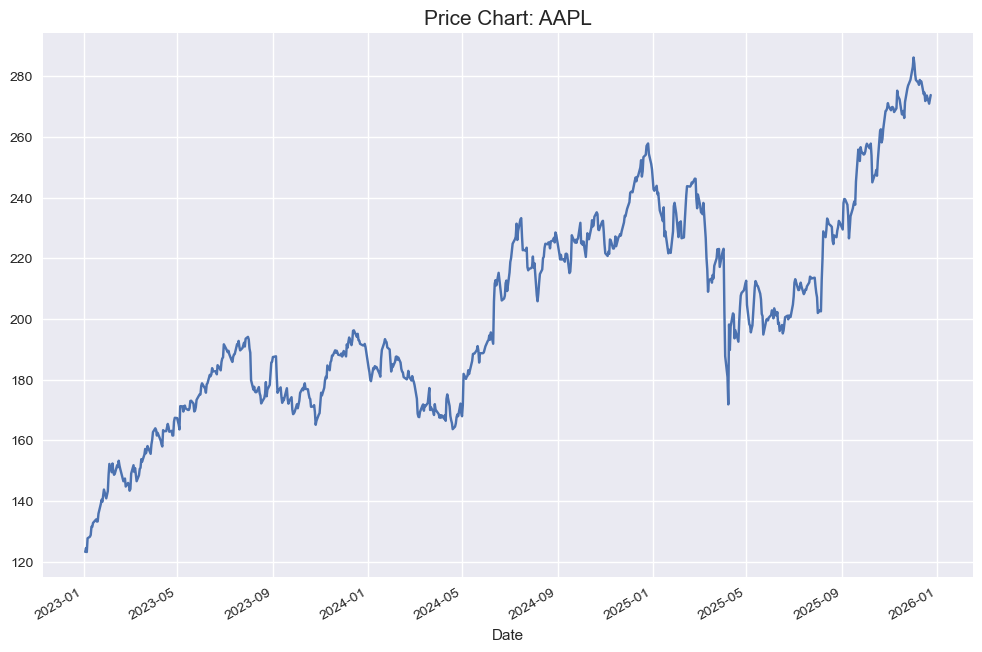

In [43]:
stock.plot_prices()

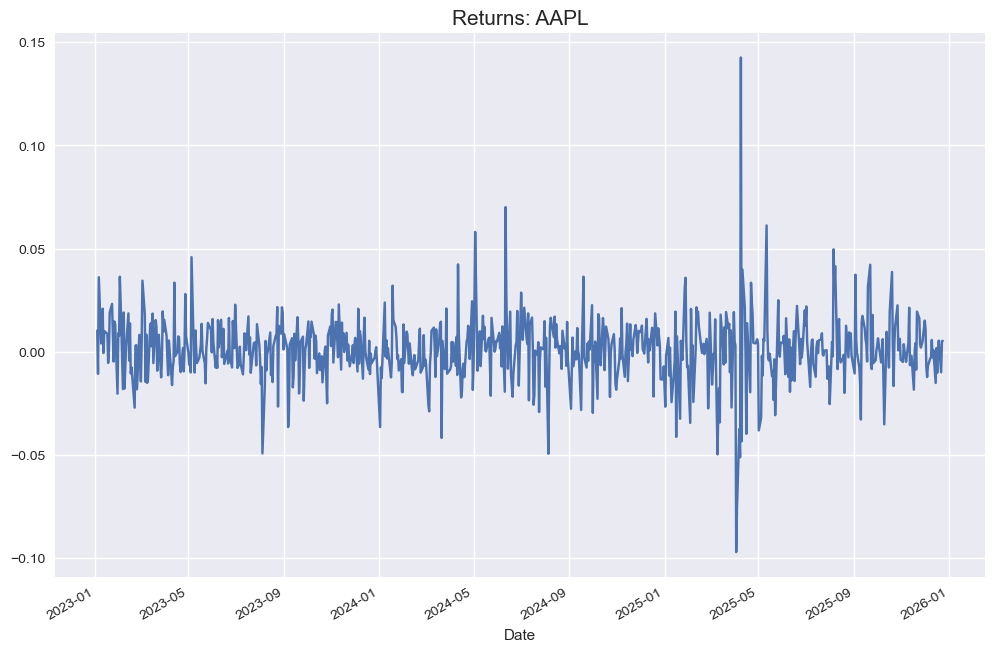

In [44]:
stock.plot_returns()

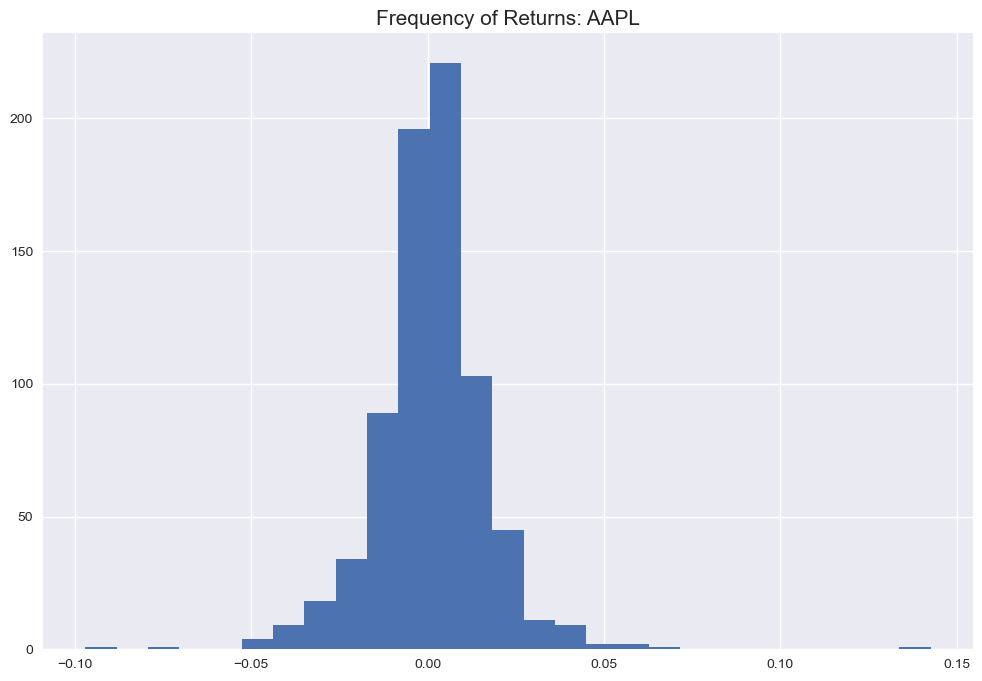

In [45]:
stock.plot_returns(kind = "hist")

## The FinancialInstrument Class live in action (Part 2)

__More Methods__

In [46]:
stock.mean_return()

np.float64(0.0010689884491892712)

In [47]:
stock.data.log_returns.mean()

np.float64(0.0010689884491892712)

In [48]:
stock.mean_return(freq = "W") # NEW - replace w by W

np.float64(0.004921294804395588)

In [49]:
stock.std_returns()

0.016069698674609875

In [50]:
stock.std_returns(freq = "W") # NEW - replace w by W

0.036004076334956975

In [51]:
stock.annualized_perf()

Return: 0.269 | Risk: 0.255


In [56]:
stock.set_ticker("PSKY")

[*********************100%***********************]  1 of 1 completed


In [57]:
stock.ticker

'PSKY'

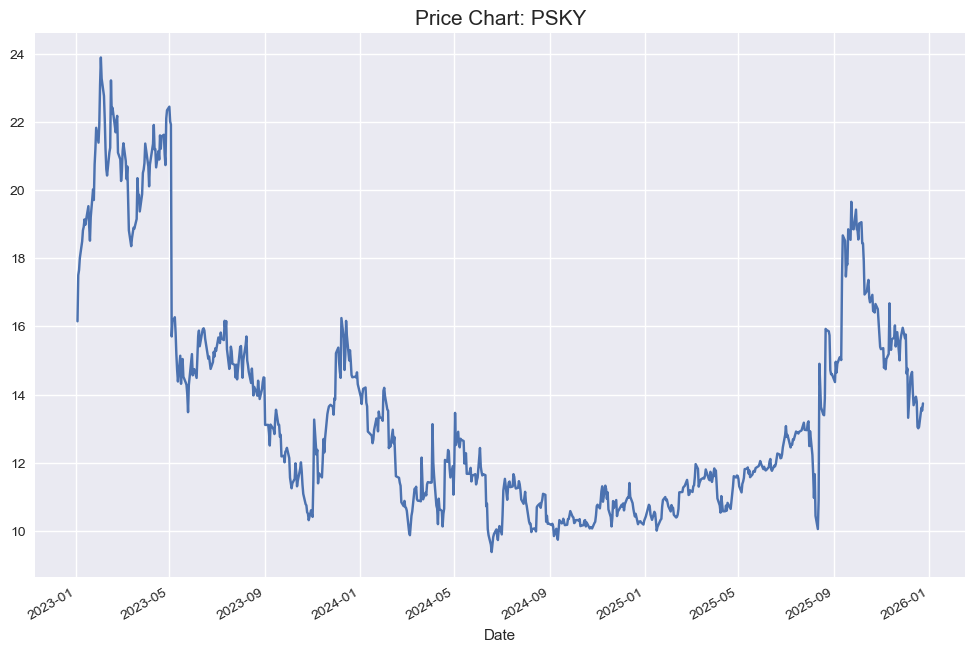

In [58]:
stock.plot_prices()

In [59]:
stock.annualized_perf()

Return: -0.055 | Risk: 0.562


## Building the FinancialInstrument Class from scratch: Instantiation

In [ ]:
class FinancialInstrument():
    pass

In [ ]:
stock = FinancialInstrument() # instantiation

In [ ]:
stock

In [ ]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end

In [ ]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31") # instantiation

In [ ]:
stock

In [ ]:
stock.ticker

In [ ]:
stock.end

In [ ]:
stock.start

## The method get_data()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn-v0_8")

In [ ]:
yf.download("AAPL", "2015-01-01", "2019-12-31").Close.to_frame() # old

In [ ]:
yf.download("AAPL", "2015-01-01", "2019-12-31", multi_level_index = False).Close.to_frame() # new from yfinance 0.2.48

In [ ]:
raw = yf.download("AAPL", "2015-01-01", "2019-12-31", multi_level_index = False).Close.to_frame()

In [ ]:
raw.rename(columns = {"Close":"price"}, inplace = True)

In [ ]:
raw

In [ ]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw

In [ ]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

In [ ]:
stock.ticker

In [ ]:
stock.data

## The method log_returns()

In [ ]:
stock.data

In [ ]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

In [ ]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

In [ ]:
stock.data

In [ ]:
stock.log_returns()

## (String) Representation

In [ ]:
stock

In [ ]:
print(stock)

In [ ]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker,
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

In [ ]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

In [ ]:
stock

In [ ]:
print(stock)

## The methods plot_prices() and plot_returns()

In [ ]:
stock

In [ ]:
stock.data

In [ ]:
stock.data.price.plot()
plt.show()

In [ ]:
stock.data.log_returns.plot()
plt.show()

In [ ]:
stock.data.log_returns.hist(bins = 100)
plt.show()

In [ ]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self.ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self.ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize = 15)  

In [ ]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

In [ ]:
stock.plot_prices()

In [ ]:
stock.plot_returns()

In [ ]:
stock.plot_returns(kind = "hist")

## Encapsulation

In [ ]:
stock

In [ ]:
stock.plot_prices()

In [ ]:
stock.ticker

In [ ]:
stock.ticker = "GE"

In [ ]:
stock.ticker

In [ ]:
stock.plot_prices()

In [ ]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)

In [ ]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

In [ ]:
stock

In [ ]:
stock.ticker

In [ ]:
stock.

In [ ]:
stock._ticker

## The method set_ticker()

In [ ]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

In [ ]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

In [ ]:
stock.plot_prices()

In [ ]:
stock.set_ticker("GE")

In [ ]:
stock.plot_prices()

## Adding more methods and performance metrics

In [ ]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [ ]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

In [ ]:
stock.mean_return()

In [ ]:
stock.mean_return("W") # NEW - replace w by W

In [ ]:
stock.std_returns()

In [ ]:
stock.std_returns("YE") # NEW - replace a by YE

In [ ]:
stock.annualized_perf()

## Inheritance

In [ ]:
class FinancialInstrumentBase(): # Parent
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

In [ ]:
class RiskReturn(FinancialInstrumentBase): # Child
    
    def __repr__(self): 
        return "RiskReturn(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                          self.start, self.end)
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [ ]:
stock = RiskReturn("aapl", "2015-01-01", "2019-12-31")

In [ ]:
stock.annualized_perf()

In [ ]:
stock.data

In [ ]:
stock.plot_prices()

In [ ]:
stock.set_ticker("ge")

In [ ]:
stock

In [ ]:
stock.mean_return("W") # NEW - replace w by W

## Inheritance and the super() Function

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn-v0_8")

In [ ]:
class FinancialInstrumentBase(): # Parent
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

In [ ]:
class RiskReturn(FinancialInstrumentBase): # Child
    
    def __init__(self, ticker, start, end, freq = None):
        self.freq = freq
        super().__init__(ticker, start, end)
    
    def __repr__(self): 
        return "RiskReturn(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                          self.start, self.end)
    def mean_return(self):
        if self.freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self):
        if self.freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [ ]:
stock = RiskReturn("aapl", "2015-01-01", "2019-12-31", freq = "W")

In [ ]:
stock.freq

In [ ]:
stock._ticker

In [ ]:
stock.data

In [ ]:
stock.plot_prices()

In [ ]:
stock.mean_return()

In [ ]:
stock.annualized_perf()

## Docstrings

In [ ]:
class FinancialInstrument():
    ''' Class to analyze Financial Instruments like stocks
    '''
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or as histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

__Final Version__

In [ ]:
class FinancialInstrument():
    ''' Class for analyzing Financial Instruments like stocks.

    Attributes
    ==========
    ticker: str
        ticker symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval

    Methods
    =======
    get_data:
        retrieves daily price data (from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart
    plot_returns:
        plots log returns either as time series ("ts") or histogram ("hist")
    set_ticker:
        sets a new ticker
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns (risk)
    annualized_perf:
        calculates annulized return and risk
    '''
    
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        ''' retrieves (from yahoo finance) and prepares the data
        '''
        raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        '''calculates log returns
        '''
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        ''' creates a price chart
        '''
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        '''sets a new ticker
        '''
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        '''calculates mean return
        '''
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        '''calculates the standard deviation of returns (risk)
        '''
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        '''calculates annulized return and risk
        '''
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))